# Power-Law Distributions and Log-Rank-Order Graphs

**Power-law distributions** are statistical distributions that follow the form P(x) ∝ x^(-α), where α is the power-law exponent. They are characterized by a "long tail" with many small values and few very large values.

## What is a Power-Law Distribution?

A power-law distribution has the property that the probability of observing a value is inversely proportional to the value raised to some power. This creates distributions where:

- **Most values are small** (the "body")
- **Few values are very large** (the "tail")
- **The tail extends far** beyond what normal distributions would predict

### Real-World Examples:

- **City sizes**: Many small cities, few megacities
- **Word frequencies**: Few common words, many rare words (Zipf's law)
- **Earthquake magnitudes**: Many small quakes, few large quakes
- **Website popularity**: Many obscure sites, few highly popular ones
- **Wealth distribution**: Many people with modest wealth, few with extreme wealth

## Detecting Power-Laws: Log-Rank-Order Plots

The standard way to detect power-law distributions is using **log-log rank-order plots**:
- X-axis: log(rank) - where rank is 1, 2, 3, ... (sorted from largest to smallest)
- Y-axis: log(value) - the actual values in descending order

If data follows a power-law, the points will fall along a **straight line** on a log-log plot!


In [1]:
# Imports - all standard libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

print("✓ All imports successful!")


✓ All imports successful!


## Example 1: Pareto Distribution (Classic Power-Law)

The Pareto distribution is the quintessential power-law distribution. It's defined for values ≥ x_min with probability density:

**P(x) = (α - 1) * x_min^(α-1) * x^(-α)**

Where α (alpha) is the power-law exponent.


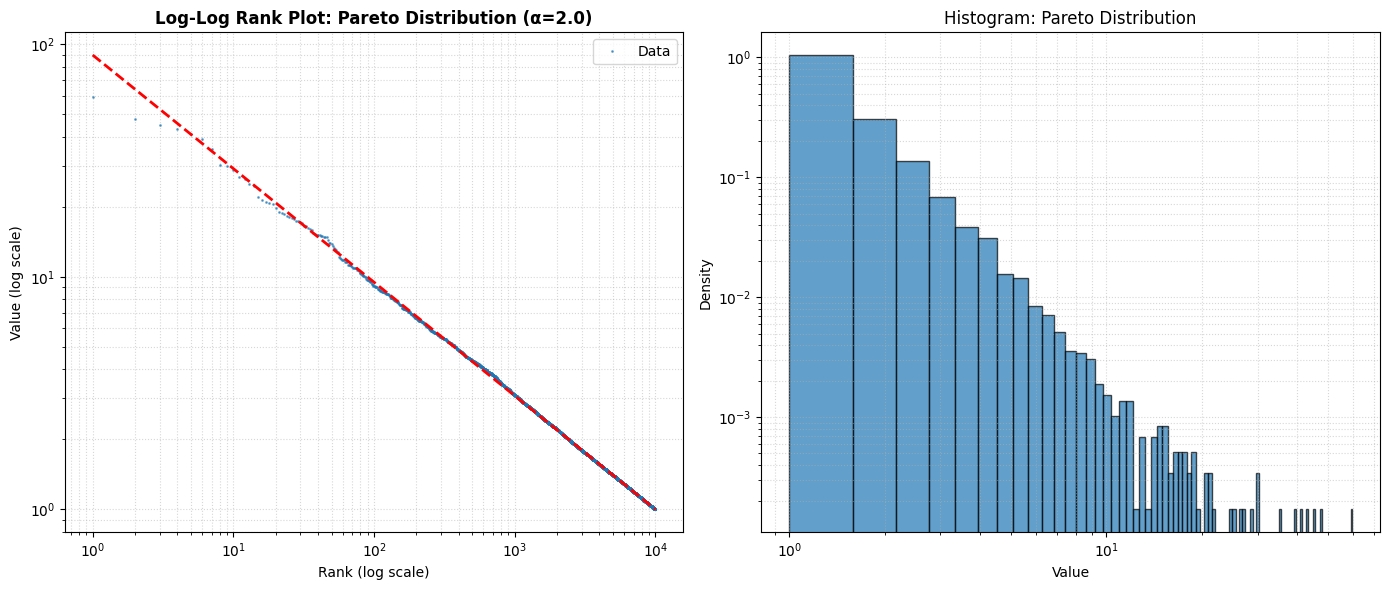

Power-law exponent (fitted): 0.488
Power-law exponent (theoretical): 2.000

✓ On log-log plot, points form a straight line → power-law distribution!
✓ The slope is approximately -2.0, matching the theoretical exponent


In [2]:
# Generate Pareto-distributed data (power-law)
# Pareto parameter: a (shape parameter) = power-law exponent α
alpha = 2.0  # Power-law exponent
x_min = 1.0  # Minimum value
n_samples = 10000

# Generate Pareto data
pareto_data = np.random.pareto(a=alpha, size=n_samples) + x_min

# Create rank-order plot
sorted_data = np.sort(pareto_data)[::-1]  # Sort descending
rank = np.arange(1, len(sorted_data) + 1)

# Create log-log plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Log-log rank plot
axes[0].loglog(rank, sorted_data, 'o', markersize=1, alpha=0.6, label='Data')
axes[0].set_xlabel('Rank (log scale)')
axes[0].set_ylabel('Value (log scale)')
axes[0].set_title(f'Log-Log Rank Plot: Pareto Distribution (α={alpha})', fontweight='bold')
axes[0].grid(True, which="both", ls=":", alpha=0.5)
axes[0].legend()

# Fit power-law line (on log scale)
log_rank = np.log(rank)
log_values = np.log(sorted_data)
# Fit linear regression on log scale: log(y) = log(a) - α*log(x)
slope, intercept = np.polyfit(log_rank, log_values, 1)
fitted_values = np.exp(intercept) * (rank ** slope)
axes[0].loglog(rank, fitted_values, 'r--', linewidth=2, 
               label=f'Fit: slope = {slope:.3f} (expected: -{alpha:.1f})')

# Regular histogram (to show the heavy tail)
axes[1].hist(pareto_data, bins=100, density=True, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].set_title('Histogram: Pareto Distribution')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].grid(True, which="both", ls=":", alpha=0.5)

plt.tight_layout()
plt.show()

print(f"Power-law exponent (fitted): {abs(slope):.3f}")
print(f"Power-law exponent (theoretical): {alpha:.3f}")
print(f"\n✓ On log-log plot, points form a straight line → power-law distribution!")
print(f"✓ The slope is approximately -{alpha:.1f}, matching the theoretical exponent")


## Example 2: Comparing Power-Law vs Normal Distribution

Let's see the difference between a power-law distribution and a normal distribution on log-log rank plots.


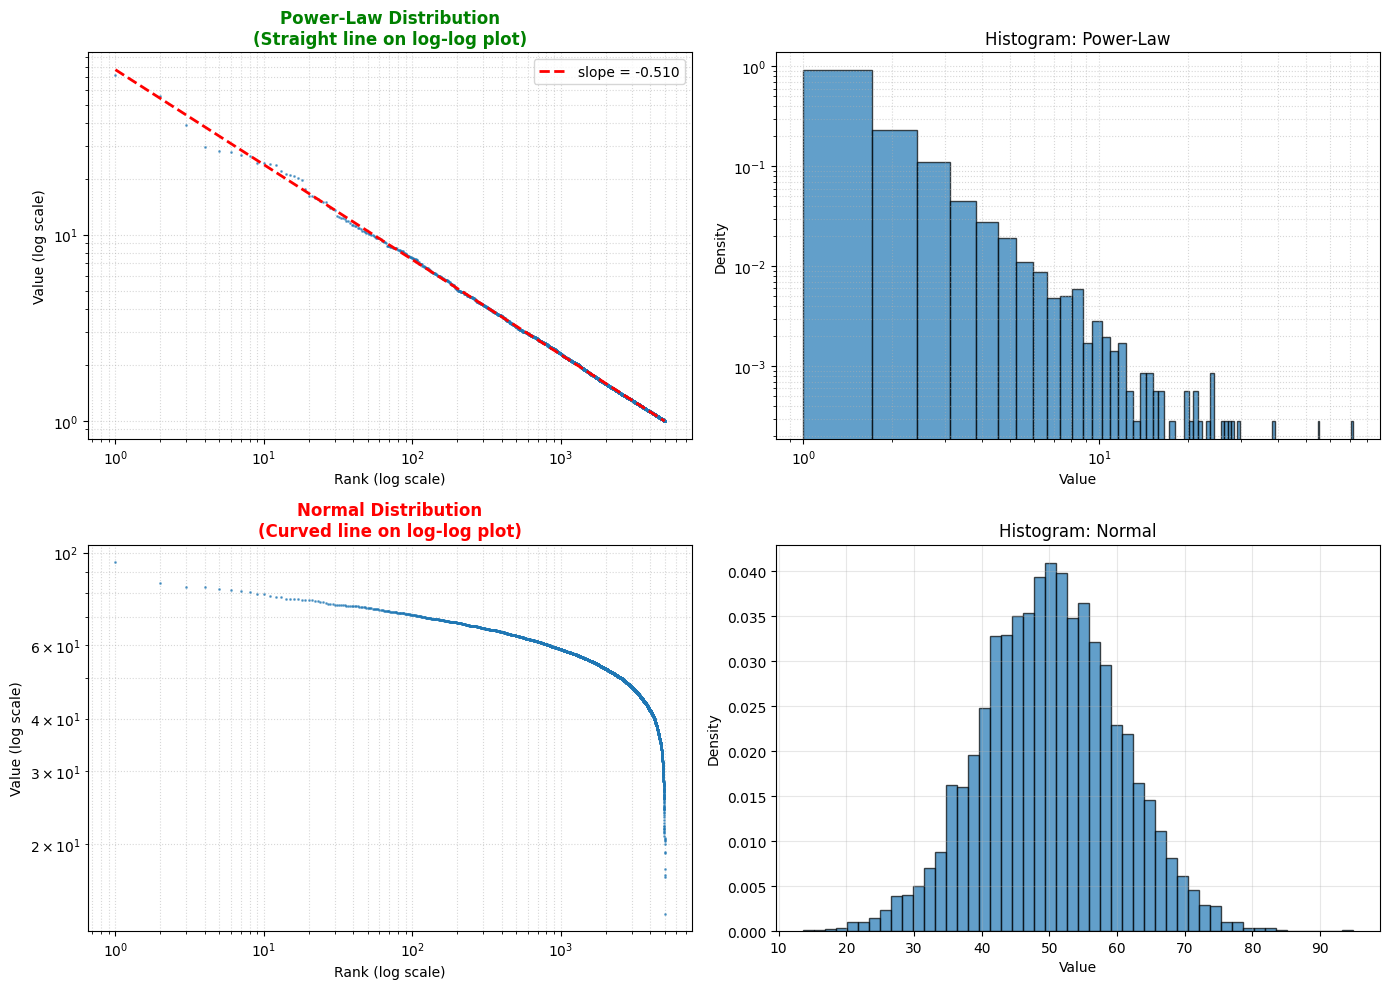

Key Difference:
  • Power-law: Straight line on log-log plot
  • Normal: Curved line on log-log plot (not a power-law)


In [3]:
# Generate both power-law (Pareto) and normal data
pareto_data = np.random.pareto(a=2.0, size=5000) + 1
normal_data = np.random.normal(loc=50, scale=10, size=5000)
normal_data = normal_data[normal_data > 0]  # Only positive for log-log plot

# Sort descending and create ranks
pareto_sorted = np.sort(pareto_data)[::-1]
normal_sorted = np.sort(normal_data)[::-1]

pareto_rank = np.arange(1, len(pareto_sorted) + 1)
normal_rank = np.arange(1, len(normal_sorted) + 1)

# Create comparison plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Pareto log-log plot
axes[0, 0].loglog(pareto_rank, pareto_sorted, 'o', markersize=1, alpha=0.6)
axes[0, 0].set_xlabel('Rank (log scale)')
axes[0, 0].set_ylabel('Value (log scale)')
axes[0, 0].set_title('Power-Law Distribution\n(Straight line on log-log plot)', 
                     fontweight='bold', color='green')
axes[0, 0].grid(True, which="both", ls=":", alpha=0.5)
# Fit line
log_r = np.log(pareto_rank)
log_v = np.log(pareto_sorted)
slope, intercept = np.polyfit(log_r, log_v, 1)
fitted = np.exp(intercept) * (pareto_rank ** slope)
axes[0, 0].loglog(pareto_rank, fitted, 'r--', linewidth=2, 
                  label=f'slope = {slope:.3f}')
axes[0, 0].legend()

# Pareto histogram
axes[0, 1].hist(pareto_data, bins=100, density=True, alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('Histogram: Power-Law')
axes[0, 1].set_xscale('log')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, which="both", ls=":", alpha=0.5)

# Normal log-log plot
axes[1, 0].loglog(normal_rank, normal_sorted, 'o', markersize=1, alpha=0.6)
axes[1, 0].set_xlabel('Rank (log scale)')
axes[1, 0].set_ylabel('Value (log scale)')
axes[1, 0].set_title('Normal Distribution\n(Curved line on log-log plot)', 
                     fontweight='bold', color='red')
axes[1, 0].grid(True, which="both", ls=":", alpha=0.5)

# Normal histogram
axes[1, 1].hist(normal_data, bins=50, density=True, alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Histogram: Normal')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Key Difference:")
print("  • Power-law: Straight line on log-log plot")
print("  • Normal: Curved line on log-log plot (not a power-law)")


## Example 3: Different Power-Law Exponents

The power-law exponent α determines the steepness of the distribution. Smaller α means heavier tails (more extreme values).


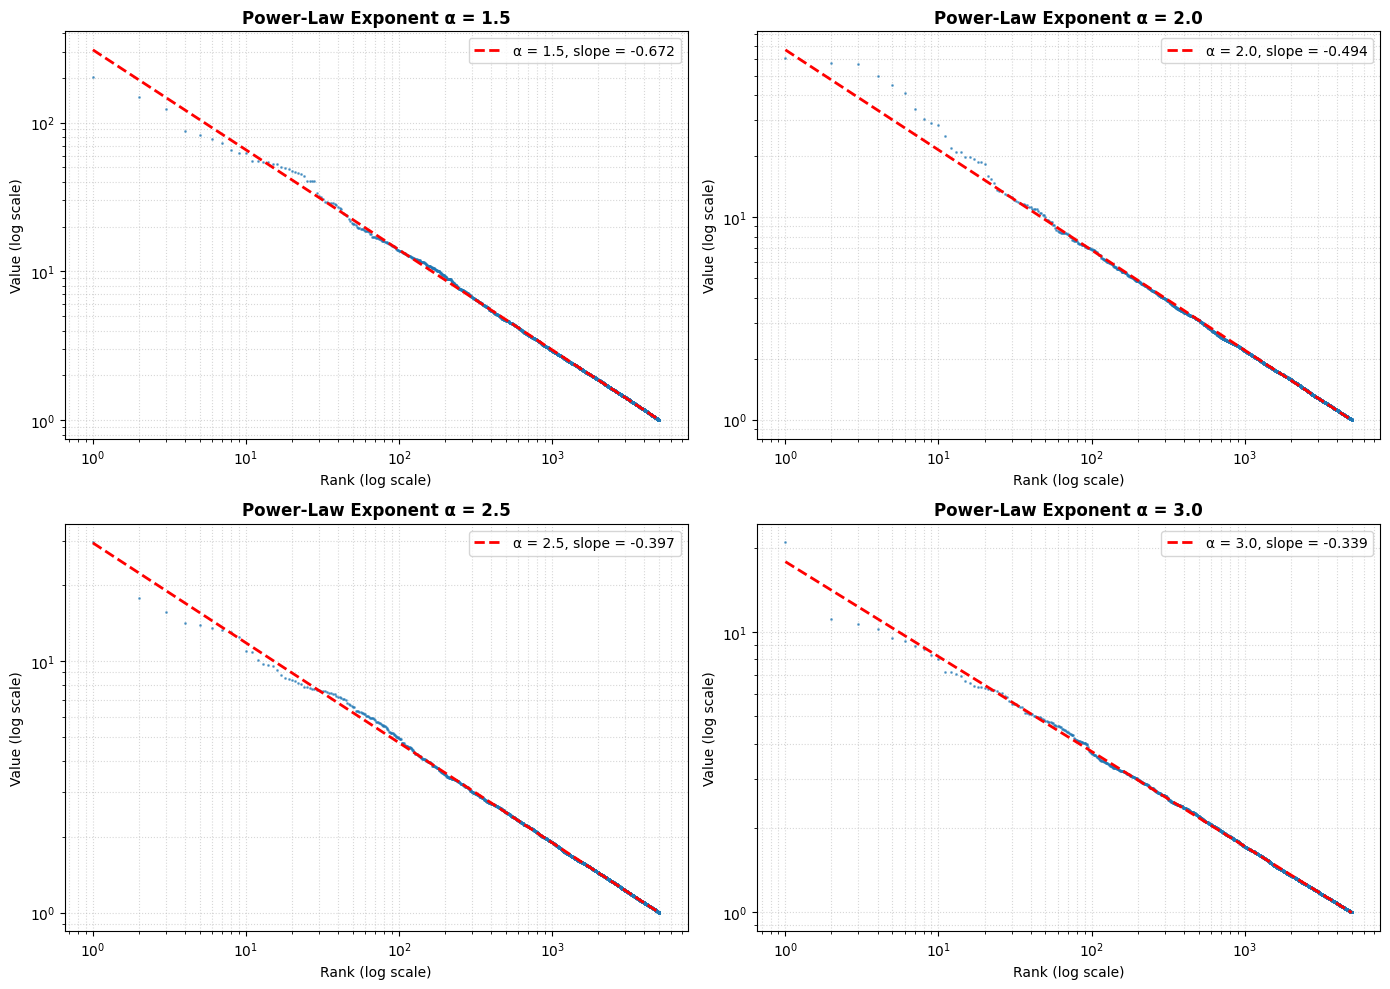

Observation: Smaller α (exponent) → steeper slope → heavier tail
This means more extreme values relative to typical values.


In [4]:
# Generate Pareto distributions with different exponents
alphas = [1.5, 2.0, 2.5, 3.0]
n_samples = 5000

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, alpha in enumerate(alphas):
    # Generate Pareto data
    data = np.random.pareto(a=alpha, size=n_samples) + 1
    sorted_data = np.sort(data)[::-1]
    rank = np.arange(1, len(sorted_data) + 1)
    
    # Log-log plot
    axes[idx].loglog(rank, sorted_data, 'o', markersize=1, alpha=0.6)
    
    # Fit line
    log_rank = np.log(rank)
    log_values = np.log(sorted_data)
    slope, intercept = np.polyfit(log_rank, log_values, 1)
    fitted = np.exp(intercept) * (rank ** slope)
    axes[idx].loglog(rank, fitted, 'r--', linewidth=2, 
                     label=f'α = {alpha:.1f}, slope = {slope:.3f}')
    
    axes[idx].set_xlabel('Rank (log scale)')
    axes[idx].set_ylabel('Value (log scale)')
    axes[idx].set_title(f'Power-Law Exponent α = {alpha}', fontweight='bold')
    axes[idx].grid(True, which="both", ls=":", alpha=0.5)
    axes[idx].legend()

plt.tight_layout()
plt.show()

print("Observation: Smaller α (exponent) → steeper slope → heavier tail")
print("This means more extreme values relative to typical values.")


## Example 4: Zipf's Law (Word Frequencies)

**Zipf's Law** is a classic example of a power-law in natural language: the frequency of a word is inversely proportional to its rank.

- **Rank 1 word**: Most frequent (e.g., "the")
- **Rank 2 word**: Second most frequent (e.g., "be")
- **Rank n word**: Frequency ∝ 1/n


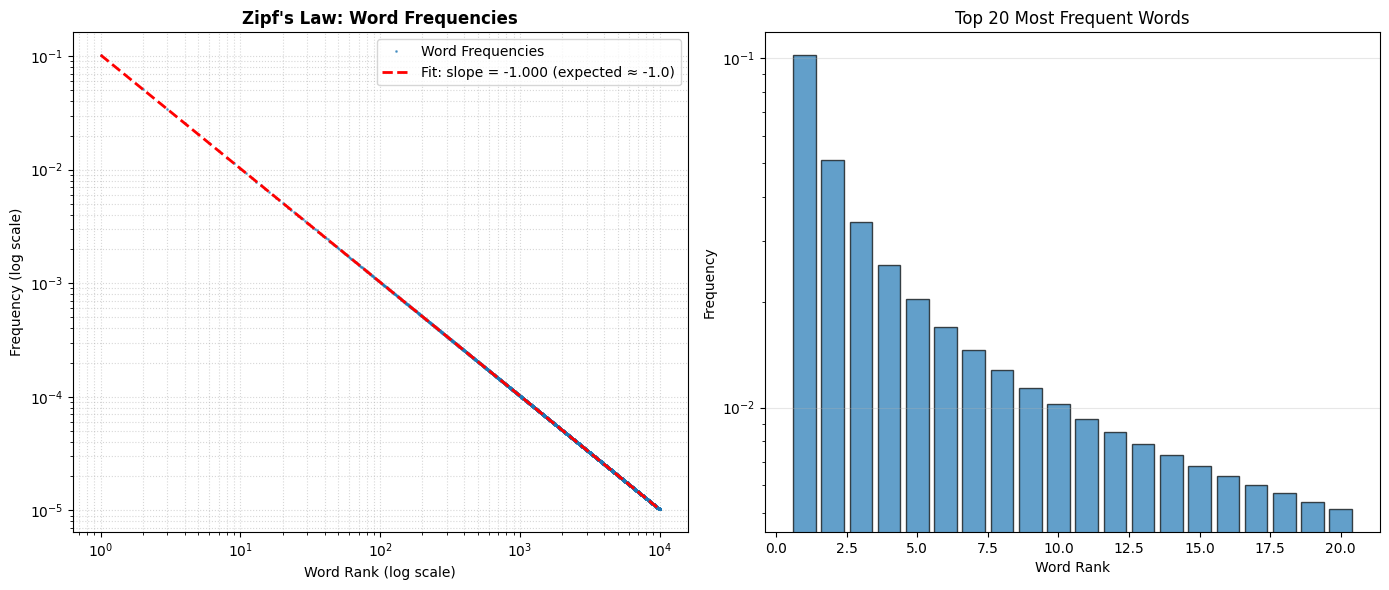

Zipf's law exponent (fitted): 1.000
Expected: ≈ 1.0

✓ Zipf's law is a power-law with exponent close to 1
✓ The most common word appears ~2× as often as the 2nd most common
✓ The 2nd most common word appears ~2× as often as the 4th most common


In [5]:
# Simulate word frequencies following Zipf's law
# Zipf's law: frequency(rank) ∝ 1/rank
# For rank r, frequency ≈ constant / r^s where s ≈ 1

# Simulate word frequencies
n_words = 10000
rank = np.arange(1, n_words + 1)
zipf_s = 1.0  # Zipf parameter (close to 1 for real languages)

# Generate frequencies (normalized)
frequencies = 1.0 / (rank ** zipf_s)
frequencies = frequencies / np.sum(frequencies)  # Normalize to sum to 1

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Log-log rank plot
axes[0].loglog(rank, frequencies, 'o', markersize=1, alpha=0.6, label='Word Frequencies')
axes[0].set_xlabel('Word Rank (log scale)')
axes[0].set_ylabel('Frequency (log scale)')
axes[0].set_title("Zipf's Law: Word Frequencies", fontweight='bold')
axes[0].grid(True, which="both", ls=":", alpha=0.5)

# Fit line
log_rank = np.log(rank)
log_freq = np.log(frequencies)
slope, intercept = np.polyfit(log_rank, log_freq, 1)
fitted = np.exp(intercept) * (rank ** slope)
axes[0].loglog(rank, fitted, 'r--', linewidth=2, 
               label=f'Fit: slope = {slope:.3f} (expected ≈ -1.0)')
axes[0].legend()

# Bar plot of top 20 words
top_n = 20
axes[1].bar(range(1, top_n + 1), frequencies[:top_n], alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Word Rank')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Top {top_n} Most Frequent Words')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"Zipf's law exponent (fitted): {abs(slope):.3f}")
print(f"Expected: ≈ 1.0")
print(f"\n✓ Zipf's law is a power-law with exponent close to 1")
print(f"✓ The most common word appears ~2× as often as the 2nd most common")
print(f"✓ The 2nd most common word appears ~2× as often as the 4th most common")


## Example 5: Real Weather Data - Station Measurements (Optional)

Let's apply log-rank-order plots to real weather data to see if any measurements follow power-law distributions.


In [6]:
# Try to load weather data (optional - works if file exists)
try:
    import dask.dataframe as dd
    
    DATA_PATH = '../../../weather_data/stations_weather_with_dist2coast_optimized.parquet'
    weather_data = dd.read_parquet(DATA_PATH)
    
    # Analyze station-level measurements (e.g., count of measurements per station)
    # Get unique stations and their measurement counts
    station_counts = weather_data.groupby('ID').size().compute()
    station_counts = station_counts[station_counts > 0]  # Only positive values
    station_counts_sorted = np.sort(station_counts.values)[::-1]
    
    if len(station_counts_sorted) > 100:
        rank = np.arange(1, len(station_counts_sorted) + 1)
        
        print(f"✓ Loaded {len(station_counts_sorted):,} station measurement counts")
        print(f"  Min: {station_counts_sorted.min()}, Max: {station_counts_sorted.max()}")
        print(f"  Mean: {station_counts_sorted.mean():.1f}, Median: {np.median(station_counts_sorted):.1f}")
        
        use_real_data = True
        data_label = "Station Measurement Counts"
    else:
        raise ValueError("Not enough data")
        
except (FileNotFoundError, ImportError, ValueError, KeyError, AttributeError) as e:
    print(f"⚠ Weather data not available ({type(e).__name__}). Using synthetic data instead.")
    # Use synthetic data that mimics station measurement distribution
    # Some stations have many measurements, most have few
    station_counts_sorted = np.random.pareto(a=1.5, size=5000) + 10
    station_counts_sorted = np.sort(station_counts_sorted)[::-1]
    rank = np.arange(1, len(station_counts_sorted) + 1)
    use_real_data = False
    data_label = "Synthetic Station Counts"


✓ Loaded 121,957 station measurement counts
  Min: 1, Max: 446
  Mean: 60.8, Median: 23.0


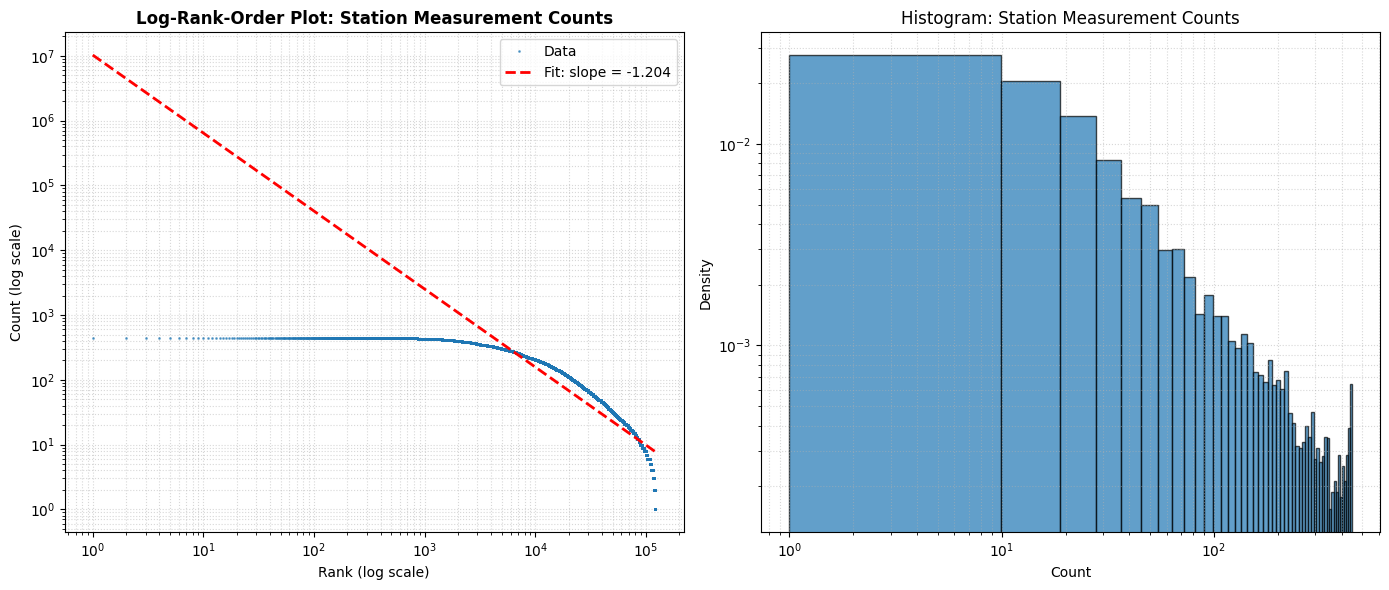


Power-law exponent (fitted): 1.204
✓ This distribution shows power-law characteristics!
  The slope of 1.204 indicates a power-law with exponent ≈ 1.204


In [7]:
# Create log-rank-order plot for station data
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Log-log rank plot
axes[0].loglog(rank, station_counts_sorted, 'o', markersize=1, alpha=0.6, label='Data')
axes[0].set_xlabel('Rank (log scale)')
axes[0].set_ylabel('Count (log scale)')
axes[0].set_title(f'Log-Rank-Order Plot: {data_label}', fontweight='bold')
axes[0].grid(True, which="both", ls=":", alpha=0.5)

# Fit power-law line
log_rank = np.log(rank)
log_values = np.log(station_counts_sorted)
slope, intercept = np.polyfit(log_rank, log_values, 1)
fitted = np.exp(intercept) * (rank ** slope)
axes[0].loglog(rank, fitted, 'r--', linewidth=2, 
               label=f'Fit: slope = {slope:.3f}')
axes[0].legend()

# Histogram
axes[1].hist(station_counts_sorted, bins=50, density=True, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Density')
axes[1].set_title(f'Histogram: {data_label}')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].grid(True, which="both", ls=":", alpha=0.5)

plt.tight_layout()
plt.show()

print(f"\nPower-law exponent (fitted): {abs(slope):.3f}")
if abs(slope) > 0.5 and abs(slope) < 3.0:
    print("✓ This distribution shows power-law characteristics!")
    print(f"  The slope of {abs(slope):.3f} indicates a power-law with exponent ≈ {abs(slope):.3f}")
else:
    print("⚠ This may not be a pure power-law distribution")
    print("  (though it may have heavy-tailed characteristics)")


## Understanding Log-Rank-Order Plots

### What Each Part Means:

1. **X-axis (log Rank)**: The rank of each value (1st largest, 2nd largest, etc.) on a log scale
2. **Y-axis (log Value)**: The actual values sorted from largest to smallest, on a log scale
3. **Straight Line**: If points fall along a straight line, you have a power-law!
4. **Slope**: The slope of the line is approximately -α, where α is the power-law exponent

### How to Interpret:

| Pattern | Interpretation |
|---------|---------------|
| **Straight line** | Power-law distribution (data follows x^(-α)) |
| **Curved downward** | Distribution has lighter tails than power-law |
| **Curved upward** | Distribution has heavier tails than power-law |
| **Multiple segments** | Different power-law regimes in different ranges |

### Power-Law Exponent α:

- **α < 2**: Very heavy tails, mean may not exist
- **α = 2-3**: Heavy tails, mean exists but variance may not
- **α > 3**: Moderate tails, both mean and variance exist
- **α → ∞**: Approaches normal distribution


## Creating Log-Rank-Order Plots: Code Template

Here's a reusable function for creating log-rank-order plots and detecting power-laws:


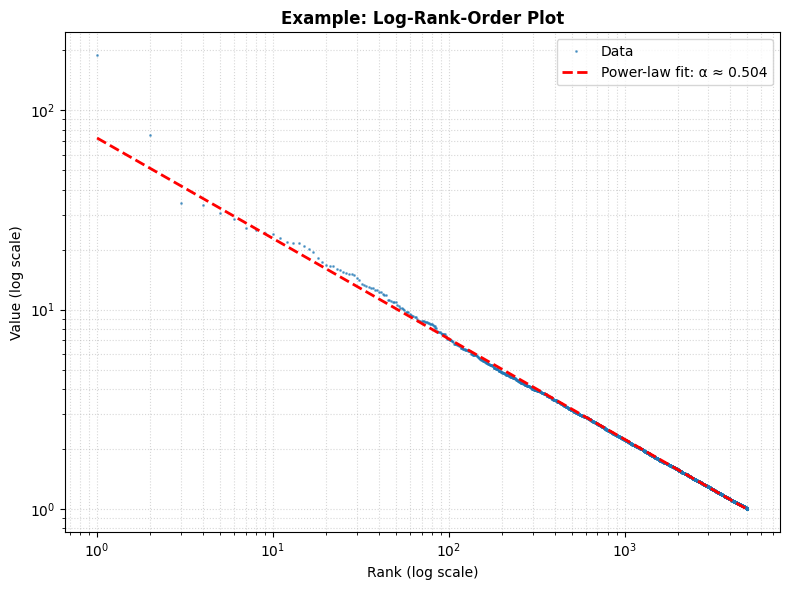

✓ Function created successfully!
  Fitted power-law exponent: α ≈ 0.504


In [8]:
def log_rank_order_plot(data, title="Log-Rank-Order Plot", ax=None, fit_line=True):
    """
    Create a log-log rank-order plot for power-law detection.
    
    Parameters:
        data: array-like, data values (must be positive)
        title: str, plot title
        ax: matplotlib axes, optional
        fit_line: bool, whether to fit and plot a power-law line
    
    Returns:
        slope: float, fitted power-law exponent (negative of slope)
        ax: matplotlib axes
    """
    # Convert to numpy array and filter positive values
    data = np.asarray(data)
    data = data[data > 0]
    
    if len(data) == 0:
        raise ValueError("No positive values in data")
    
    # Sort in descending order
    sorted_data = np.sort(data)[::-1]
    rank = np.arange(1, len(sorted_data) + 1)
    
    # Create plot
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    # Log-log scatter plot
    ax.loglog(rank, sorted_data, 'o', markersize=1, alpha=0.6, label='Data')
    
    # Fit power-law line
    if fit_line:
        log_rank = np.log(rank)
        log_values = np.log(sorted_data)
        slope, intercept = np.polyfit(log_rank, log_values, 1)
        fitted = np.exp(intercept) * (rank ** slope)
        ax.loglog(rank, fitted, 'r--', linewidth=2, 
                 label=f'Power-law fit: α ≈ {abs(slope):.3f}')
        ax.legend()
    else:
        slope = None
    
    ax.set_xlabel('Rank (log scale)')
    ax.set_ylabel('Value (log scale)')
    ax.set_title(title, fontweight='bold')
    ax.grid(True, which="both", ls=":", alpha=0.5)
    
    return slope, ax

# Example usage
fig, ax = plt.subplots(figsize=(8, 6))
test_data = np.random.pareto(a=2.0, size=5000) + 1
slope, ax = log_rank_order_plot(test_data, title="Example: Log-Rank-Order Plot", ax=ax)
plt.tight_layout()
plt.show()

print(f"✓ Function created successfully!")
print(f"  Fitted power-law exponent: α ≈ {abs(slope):.3f}")


## Summary

### Key Concepts:

1. **Power-Law Distributions**: P(x) ∝ x^(-α) - characterized by heavy tails
2. **Log-Rank-Order Plots**: Tool to detect power-laws by plotting log(rank) vs log(value)
3. **Power-Law Exponent α**: Determines tail heaviness (smaller α = heavier tail)
4. **Straight Line on Log-Log Plot**: Indicates power-law distribution

### Takeaways:

- **Heavy tails** = power-law distributions have many small values and few very large values
- **Log-log plot** = the standard way to visualize and detect power-laws
- **Real-world examples** = city sizes, word frequencies, website popularity, wealth
- **Be careful** = not all heavy-tailed distributions are power-laws!

### When to Use Log-Rank-Order Plots:

✅ To detect power-law distributions in data
✅ To estimate power-law exponents
✅ To compare different distributions' tail behavior
✅ For exploratory data analysis of heavy-tailed phenomena
✅ To validate power-law models

### Limitations:

⚠️ Power-law detection requires sufficient data (typically 1000+ points)
⚠️ Log-log plots can be misleading for non-power-law distributions
⚠️ Multiple power-law regimes may exist in different ranges
⚠️ Consider using statistical tests (e.g., Clauset-Shalizi-Newman test) for rigorous validation
